In [326]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})

# df = df[abs(df['last_price_delta_since_stabilized']) > 1]
# df = df[abs(df['last_price_delta_since_stabilized']) < 8]

# df = df[abs(df['last_price_delta_since_stabilized']) < 10]
# df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
# df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
# df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
# df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

# for col in df.columns:
#     if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
#         df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

# df = df[df['0_price_delta'] < 4]

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_nr_trades,0_price_delta,0_spread,1_amount_mean,1_nr_trades,1_price_delta,1_spread,2_amount_mean,2_nr_trades,...,past_final_price_0,past_final_price_1,past_final_price_2,past_final_price_3,past_final_price_4,past_final_price_5,past_final_price_6,past_final_price_7,past_final_price_8,past_final_price_9
0,0.0073,4.0,0.23,0.40,0.0146,5.0,0.23,0.56,0.0167,6.0,...,0.90,-4.09,-4.49,-2.42,-3.59,-1.88,-1.55,-2.97,-0.89,0.00
1,0.0026,5.0,0.39,0.27,0.0023,6.0,0.39,0.27,0.0021,7.0,...,0.70,-4.29,-4.69,-2.62,-3.79,-2.08,-1.75,-3.17,-1.09,-0.20
2,0.0037,18.0,0.15,0.72,0.0035,19.0,0.15,0.73,0.0034,20.0,...,-3.15,-3.55,-1.48,-2.65,-0.94,-0.61,-2.03,0.05,0.94,0.00
3,0.0053,4.0,1.65,0.61,0.0047,5.0,1.63,0.63,0.0059,7.0,...,-1.73,0.34,-0.83,0.88,1.21,-0.21,1.87,2.76,1.82,0.00
4,0.0086,4.0,0.13,0.46,0.0278,5.0,0.13,0.46,0.0274,6.0,...,-1.34,-2.51,-0.80,-0.47,-1.89,0.19,1.08,0.14,-1.68,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,0.0475,5.0,0.58,0.84,0.0396,6.0,0.58,0.84,0.0340,7.0,...,-1.26,-1.74,-1.38,0.71,1.52,0.62,-0.50,-0.50,-1.52,0.00
43996,0.0252,5.0,0.15,0.30,0.0229,6.0,0.15,0.30,0.0174,8.0,...,-0.42,-0.90,-0.54,1.55,2.36,1.46,0.34,0.34,-0.68,0.84
43997,0.0130,11.0,0.02,0.48,0.0120,12.0,0.02,0.49,0.0114,13.0,...,-0.22,0.14,2.23,3.04,2.14,1.02,1.02,0.00,1.52,0.00
43998,0.0100,3.0,0.85,0.09,0.0107,4.0,0.67,0.27,0.0220,5.0,...,-0.89,-0.53,1.56,2.37,1.47,0.35,0.35,-0.67,0.85,-0.67


In [327]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0, ascending=False)

last_price_delta_since_stabilized    1000.000000
past_final_price_8                    659.504773
wave_direction                        542.950290
past_final_price_7                    528.562297
past_final_price_6                    456.939978
past_final_price_5                    401.060442
past_final_price_4                    372.772111
past_final_price_3                    350.847309
past_final_price_2                    329.010952
past_final_price_1                    316.047724
past_final_price_0                    289.644478
past_final_price_9                    103.277551
stabilized_at_ms                       37.606383
2_price_delta                          33.361758
1_price_delta                          32.254033
4_price_delta                          30.878698
3_price_delta                          29.553269
0_price_delta                          24.526407
stabilized_nr_trades                    9.882120
4_nr_trades                             5.434458
0_nr_trades         

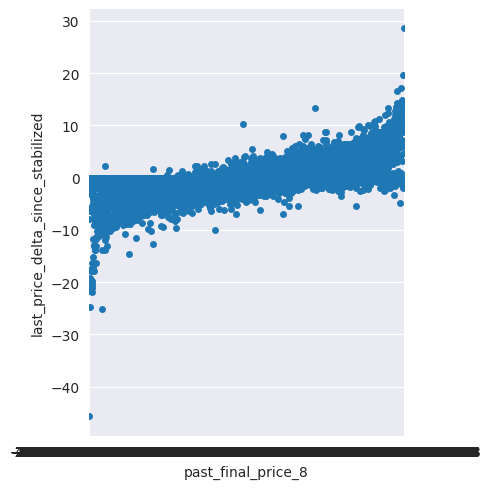

In [328]:
# df.wave_direction.mean()
sns.catplot(x=df.past_final_price_8, y=df.last_price_delta_since_stabilized)


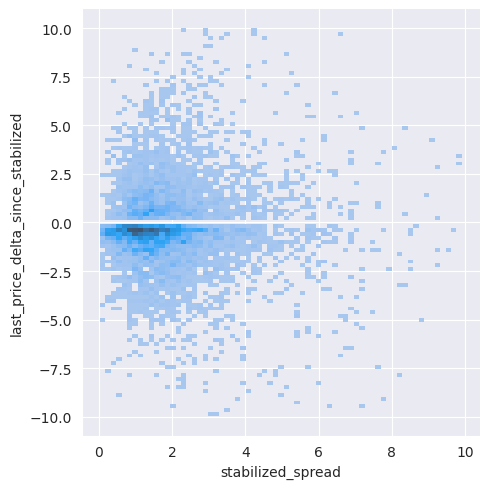

In [325]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_spread)


<AxesSubplot: xlabel='past_final_price_6', ylabel='last_price_delta_since_stabilized'>

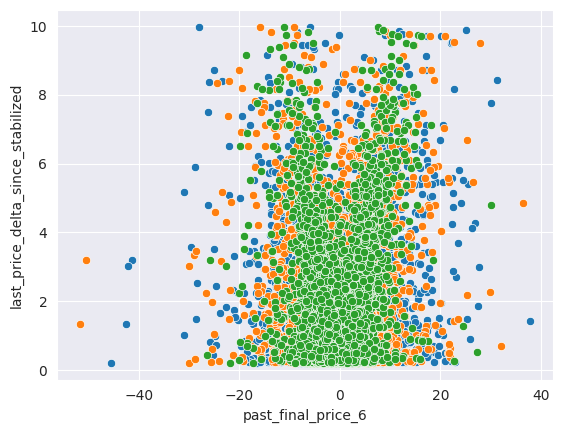

In [324]:
sns.scatterplot(x=df['past_final_price_6'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_7'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_8'], y=abs(df.last_price_delta_since_stabilized))

